In [1]:
#Importing required libraries
import keras, os
import numpy as np
import tensorflow as tf
from keras.datasets import cifar100
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPool2D, BatchNormalization
from keras.utils import to_categorical
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.metrics import Precision, Recall
from keras import optimizers
from keras.optimizers import Adam
import matplotlib.pyplot as plt
from keras import backend as K
from keras import regularizers

In [2]:
train=True
num_classes = 100

In [3]:
# getting data and preprocessing
(x_train, y_train), (x_test, y_test) = cifar100.load_data()
x_train=x_train/255.0
x_test=x_test/255.0

y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

169009152/169001437 [==============================] - 4s 0us/step


In [4]:
#Model summary 

x_shape = (32,32,3)
model = Sequential()
model.add(Conv2D(input_shape = x_shape, filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(BatchNormalization())
model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(BatchNormalization())
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(BatchNormalization())
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(BatchNormalization())
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(BatchNormalization())
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(BatchNormalization())
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(BatchNormalization())
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(BatchNormalization())
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

model.add(Flatten())
model.add(Dense(units=2048, activation="relu"))
model.add(Dense(units=1024,activation="relu"))
model.add(Dense(units=100,activation="softmax"))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 64)        1792      
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 64)        256       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 64)        36928     
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 64)        256       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 128)       73856     
_________________________________________________________________
batch_normalization_2 (Batch (None, 16, 16, 128)       5

In [5]:
# optimization details
opt = Adam(lr=0.001, decay = 1e-06)
model.compile(optimizer= opt, loss='categorical_crossentropy', metrics=['accuracy', 'Precision', 'Recall'])

In [6]:
batch_size = 128

checkpoint = ModelCheckpoint("vggbatchnorm.h5", monitor='val_accuracy', verbose=2, save_best_only=True, save_weights_only=True, mode='auto')
early = EarlyStopping(monitor='val_loss', min_delta=0.0001, patience=30, verbose=2, mode='auto')


# Data Augmentation
datagen = ImageDataGenerator(width_shift_range = 0.1,
                             height_shift_range = 0.1,
                             rotation_range = 10,
                             horizontal_flip = True,
                             vertical_flip = False,
                             fill_mode = 'nearest')

# Training the model
hist = model.fit_generator(datagen.flow(x_train, y_train,
                                 batch_size=batch_size),
                    steps_per_epoch=x_train.shape[0] // batch_size,
                    epochs=100,
                    validation_data=(x_test, y_test),callbacks=[checkpoint, early],verbose=2)

# Save model
model.save_weights('vggbatchnorm.h5') 

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/100

Epoch 00001: val_accuracy improved from -inf to 0.01560, saving model to vggbatchnorm.h5
390/390 - 32s - loss: 3.9377 - accuracy: 0.0833 - precision: 0.3682 - recall: 0.0035 - val_loss: 7.0598 - val_accuracy: 0.0156 - val_precision: 0.0274 - val_recall: 0.0089
Epoch 2/100

Epoch 00002: val_accuracy improved from 0.01560 to 0.12270, saving model to vggbatchnorm.h5
390/390 - 31s - loss: 3.4084 - accuracy: 0.1589 - precision: 0.5425 - recall: 0.0214 - val_loss: 4.3375 - val_accuracy: 0.1227 - val_precision: 0.2362 - val_recall: 0.0552
Epoch 3/100

Epoch 00003: val_accuracy improved from 0.12270 to 0.21300, saving model to vggbatchnorm.h5
390/390 - 31s - loss: 3.0485 - accuracy: 0.2231 - precision: 0.6118 - recall: 0.0577 - val_loss: 3.2917 - val_accuracy: 0.2130 - val_precision: 0.4627 - val_recall: 0.1105
Epoch 4/100

Epoch 00004: val_accuracy did not improve from 0.21300
390/390 - 30s - loss: 2.7540

In [10]:
model.load_weights(filepath = 'vggbatchnorm.h5')
scores = model.evaluate(x_test, y_test, verbose=2)
print("Accuracy: %.2f%%" % (scores[1]*100))
print("Precison: %.2f%%" % (scores[2]*100))
print("Recall: %.2f%%" % (scores[3]*100))

313/313 - 3s - loss: 2.0314 - accuracy: 0.5995 - precision: 0.6709 - recall: 0.5709
Accuracy: 59.95%
Precison: 67.09%
Recall: 57.09%


Text(0.5, 1.0, 'recall')

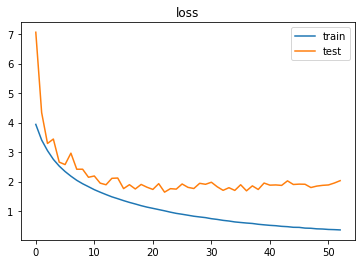

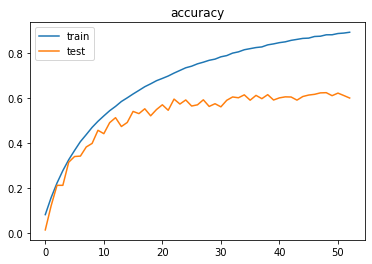

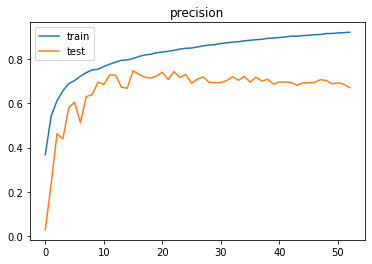

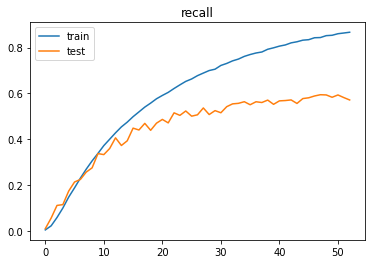

In [11]:
# Plotting Loss, Accuracy, Precision and Recall
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.legend(['train','test'])
plt.title('loss')
plt.figure()
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.legend(['train','test'])
plt.title('accuracy')
plt.figure()
plt.plot(hist.history['precision'])
plt.plot(hist.history['val_precision'])
plt.legend(['train','test'])
plt.title('precision')
plt.figure()
plt.plot(hist.history['recall'])
plt.plot(hist.history['val_recall'])
plt.legend(['train','test'])
plt.title('recall')

In [9]:
# Printing the saved weights in numpy arrays
for layer in model.layers: 
  print(layer.get_weights())

Streaming output truncated to the last 5000 lines.
        0.19657962,  0.45043555,  0.68337446,  0.03182428,  0.0360338 ,
        0.04764435, -0.19196826,  0.3592292 ,  0.13981088,  0.19816762,
        0.0858146 ,  0.21761009,  0.06265074,  0.3429466 ,  0.1904448 ,
        0.34105796, -0.05843986,  0.13640821,  0.4541157 ,  0.3387363 ,
        0.2009676 ], dtype=float32), array([ 1.6875715 ,  1.4019951 ,  1.1514857 ,  3.447576  ,  1.4562333 ,
        4.6839156 ,  5.8281975 ,  2.2654967 ,  1.3863391 ,  1.3826437 ,
        1.3966982 ,  0.48154876,  2.0357141 ,  0.9379855 ,  2.3932753 ,
        2.6375368 ,  0.8939406 ,  1.9905739 ,  2.4365265 ,  2.0468845 ,
        1.1261283 ,  1.248689  ,  1.5676614 ,  4.1355853 ,  0.8786182 ,
        1.4480038 ,  8.965759  ,  1.5746198 ,  1.3984236 ,  1.7634841 ,
        1.1617646 ,  1.4290875 ,  1.2993754 ,  0.8235817 ,  1.51005   ,
        1.8862075 ,  2.0872474 , 32.20301   ,  1.2392837 ,  2.0205579 ,
        2.9366326 ,  1.2905513 ,  1.3286406 ,  1